In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import OneHotEncoder

In [4]:
data = pd.read_csv(r"C:\Users\arund\OneDrive\Desktop\earthquakes_2023_global.csv")

pd.set_option('display.max_columns', None)

In [5]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,us,us7000j5a1,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,us,us7000j3xk,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,pr,pr2023001000,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,us,us7000j3xm,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,us,us7000j1zd,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26642 entries, 0 to 26641
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             26642 non-null  object 
 1   latitude         26642 non-null  float64
 2   longitude        26642 non-null  float64
 3   depth            26642 non-null  float64
 4   mag              26642 non-null  float64
 5   magType          26642 non-null  object 
 6   nst              25227 non-null  float64
 7   gap              25225 non-null  float64
 8   dmin             24776 non-null  float64
 9   rms              26642 non-null  float64
 10  net              26642 non-null  object 
 11  id               26642 non-null  object 
 12  updated          26642 non-null  object 
 13  place            25034 non-null  object 
 14  type             26642 non-null  object 
 15  horizontalError  25093 non-null  float64
 16  depthError       26642 non-null  float64
 17  magError    

In [7]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


In [8]:
data.shape

(26642, 22)

In [9]:
data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1415
gap                1417
dmin               1866
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError    1549
depthError            0
magError           1672
magNst             1577
status                0
locationSource        0
magSource             0
dtype: int64

In [10]:
data.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [11]:
data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1415
gap                1417
dmin               1866
rms                   0
net                   0
id                    0
updated               0
place              1608
type                  0
horizontalError    1549
depthError            0
magError           1672
magNst             1577
status                0
locationSource        0
magSource             0
dtype: int64

In [12]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

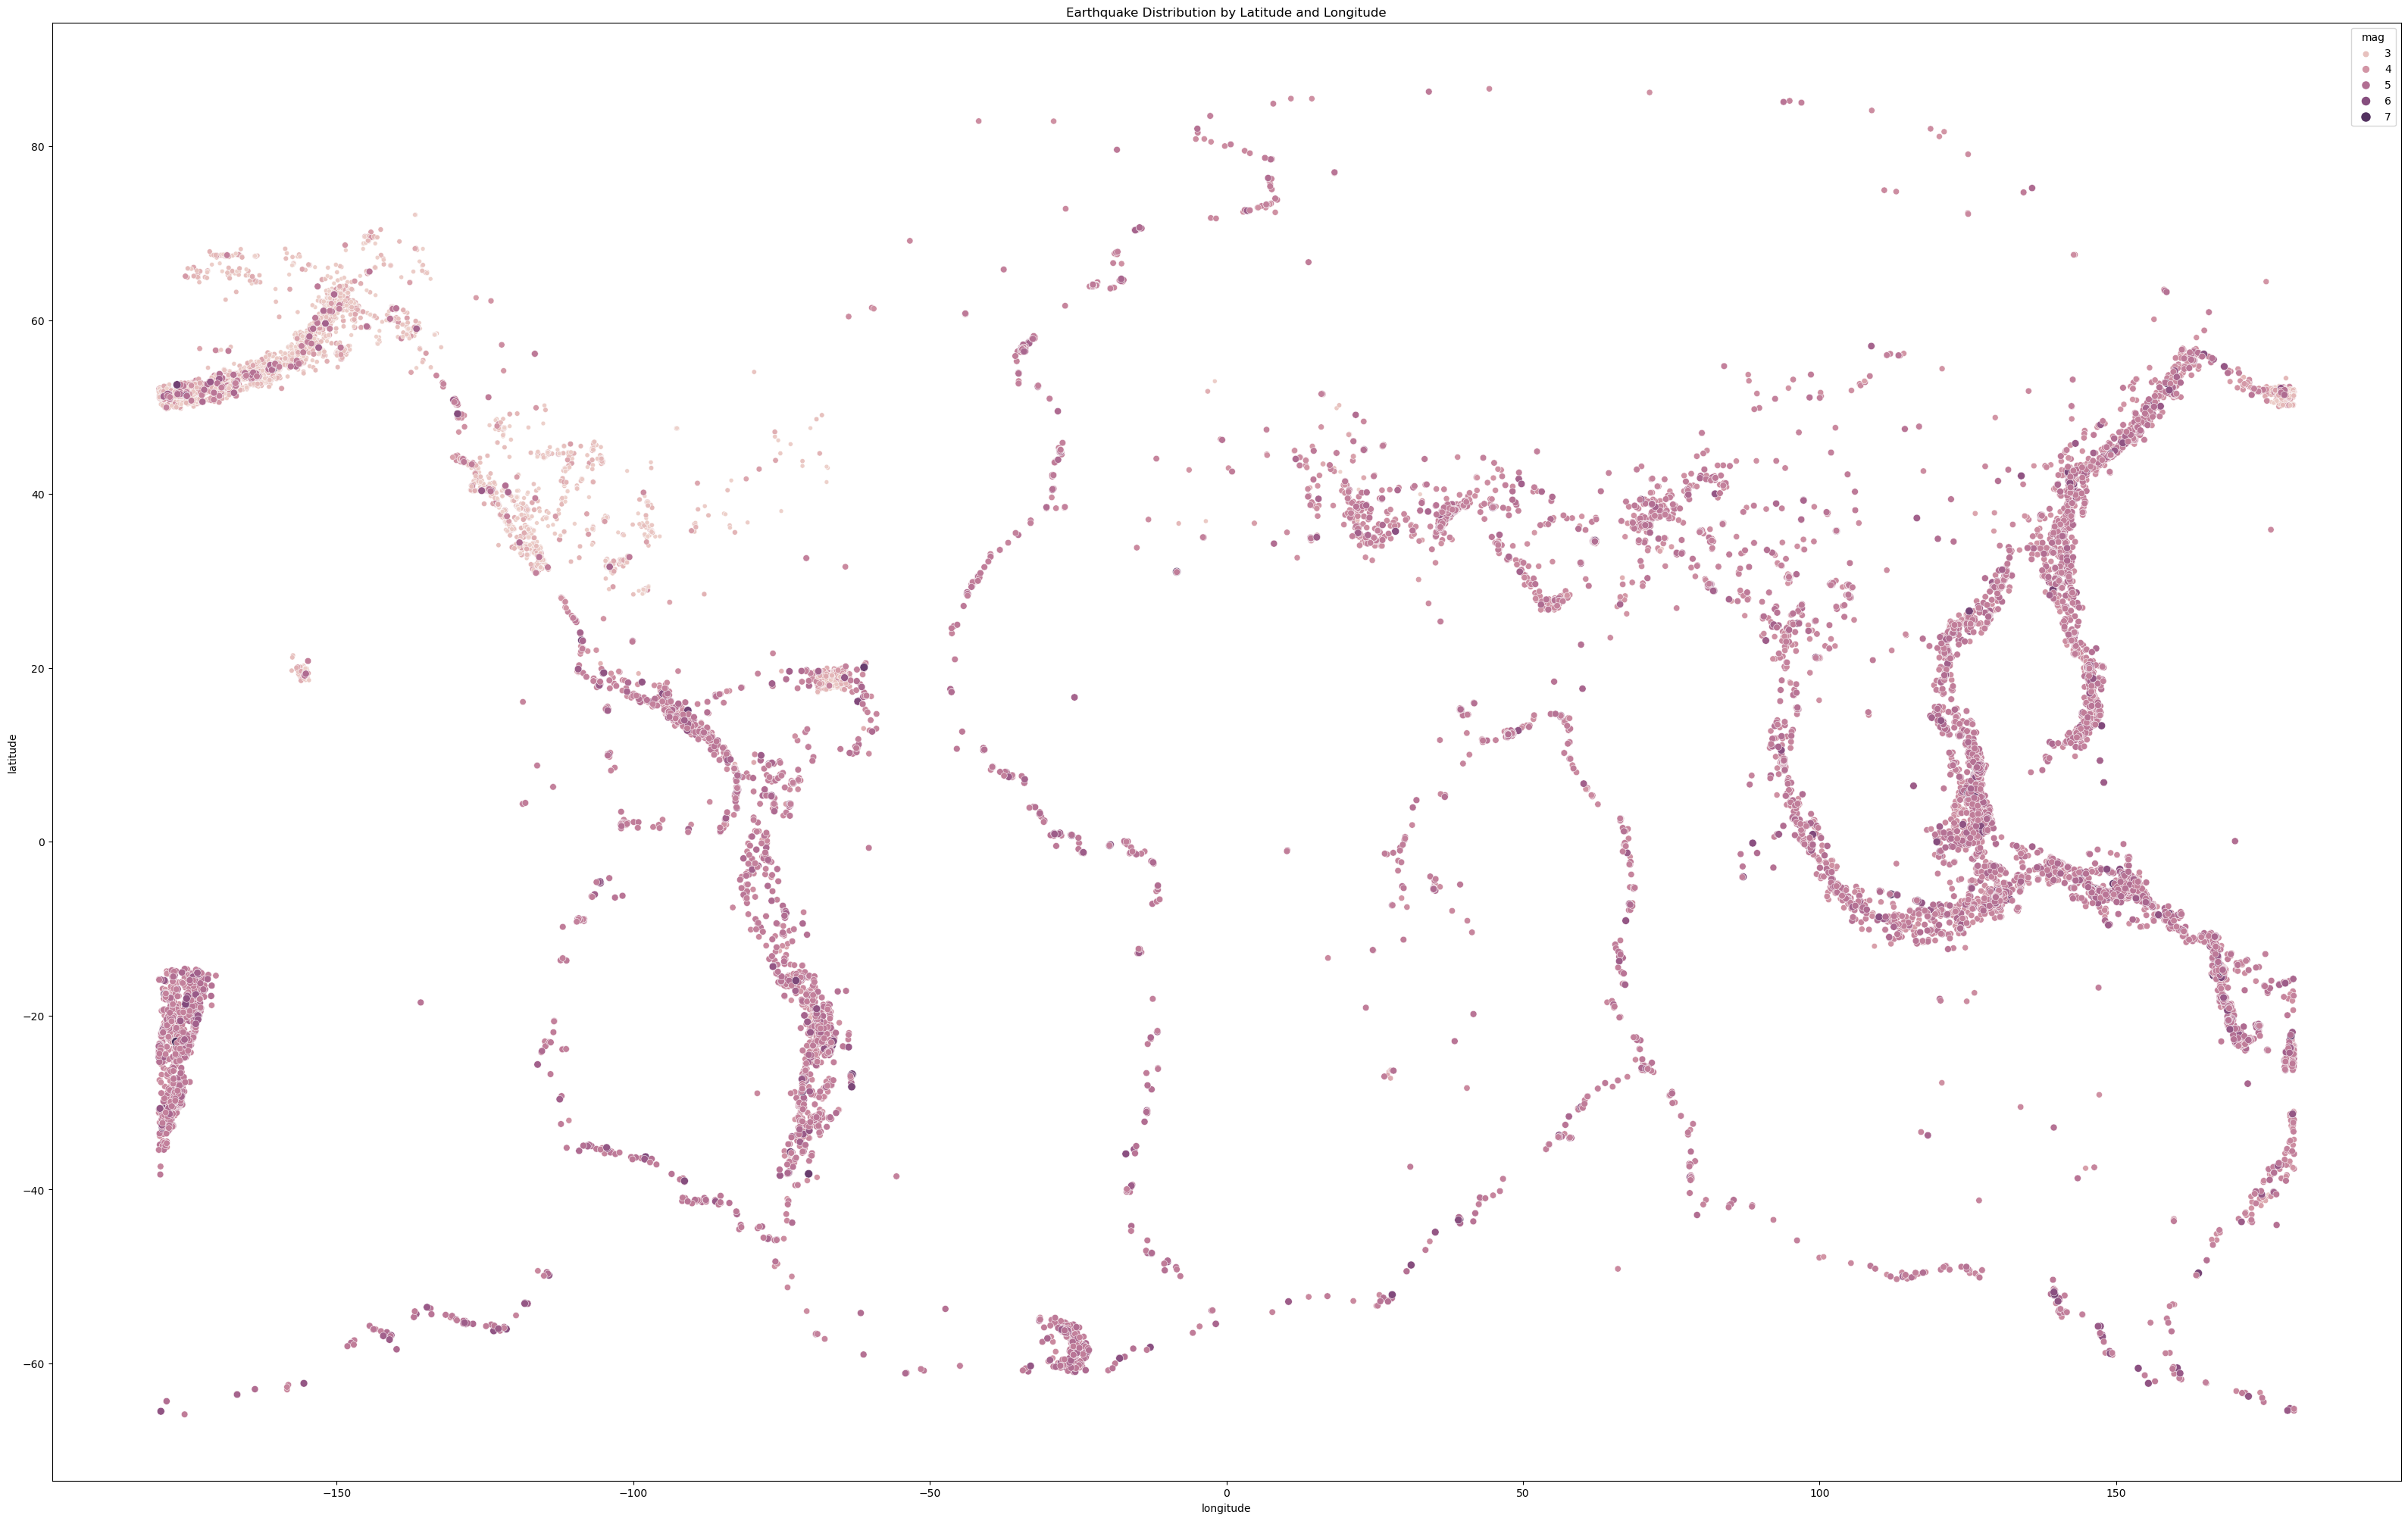

In [13]:
plt.figure(figsize=(40, 25))
sns.scatterplot(x='longitude', y='latitude', hue='mag', size='mag', data=data)
plt.title('Earthquake Distribution by Latitude and Longitude')
plt.show()

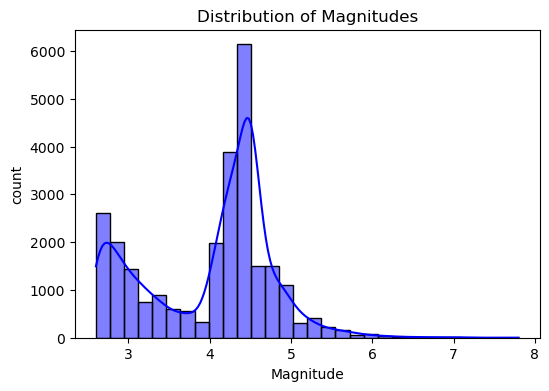

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data['mag'], bins=30, kde=True, color='blue')
plt.title('Distribution of Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('count')
plt.show()

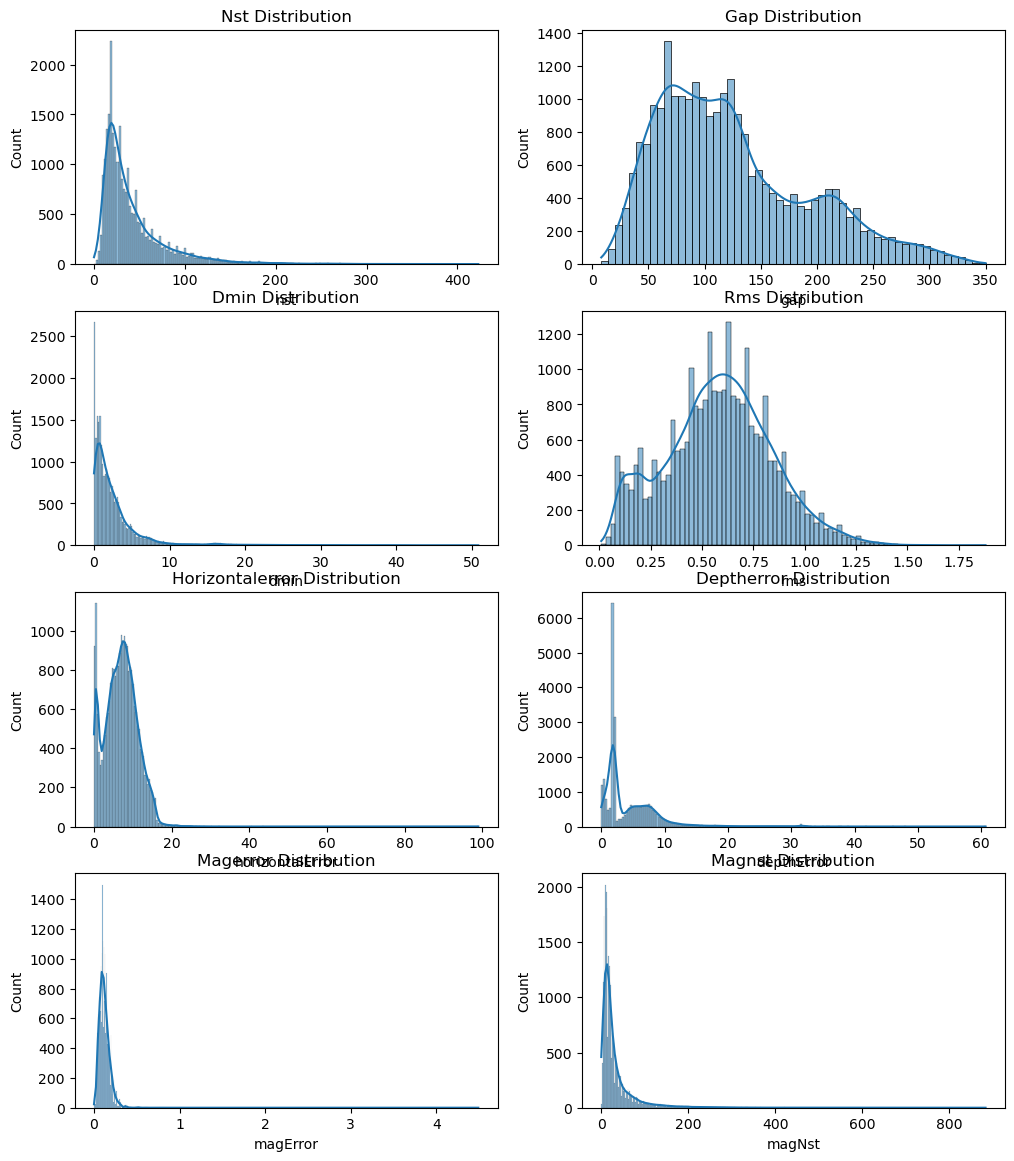

In [15]:
dist_num_data=data.select_dtypes(include=['float64', 'int64']).drop(['latitude','longitude','depth','mag'],axis=1)
fig,axs=plt.subplots(len(dist_num_data.columns)//2,2,figsize=(12,14))
axs=axs.flatten()
for ax,d in zip(axs,dist_num_data):
 sns.histplot(ax=ax,data=dist_num_data[d],kde=True)
 ax.set_title("{} Distribution".format(str(dist_num_data[d].name).capitalize()))

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'earthquake'),
  Text(1, 0, 'mining explosion'),
  Text(2, 0, 'quarry blast'),
  Text(3, 0, 'ice quake'),
  Text(4, 0, 'explosion'),
  Text(5, 0, 'Landslide'),
  Text(6, 0, 'volcanic eruption'),
  Text(7, 0, 'landslide')])

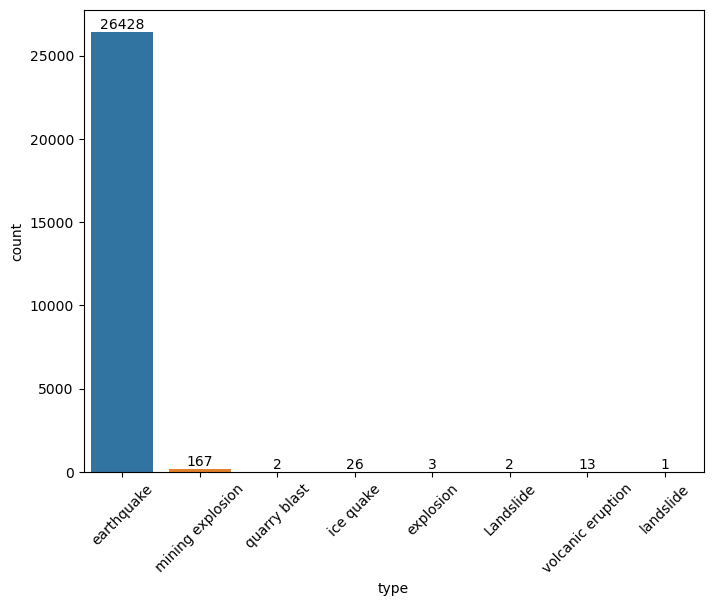

In [16]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='type',data=data)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

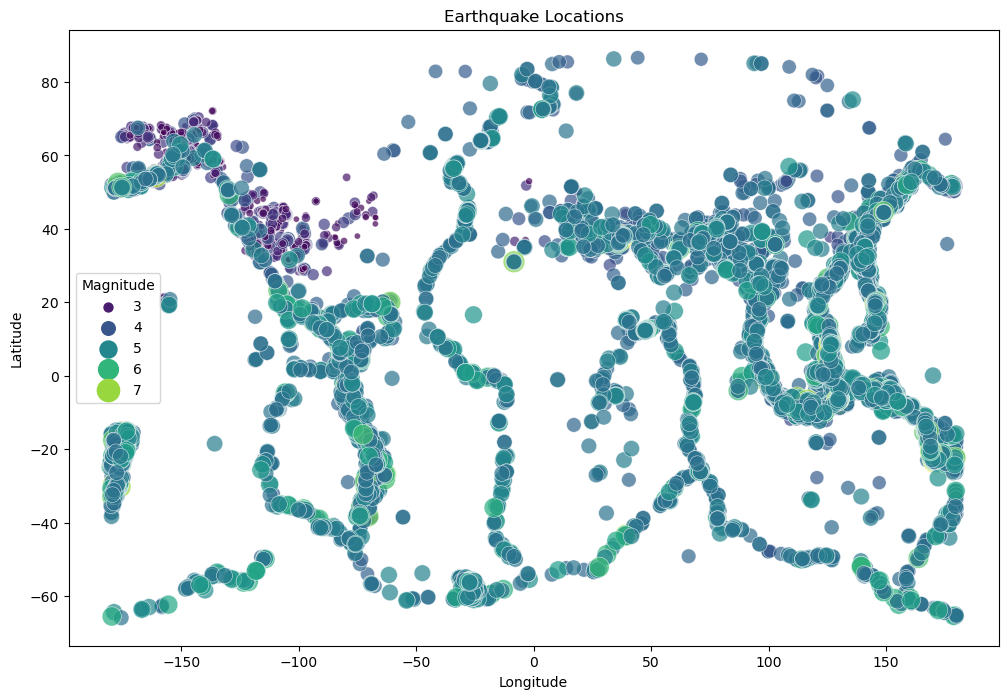

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='mag', size='mag',sizes=(20, 300),
 data=data, palette='viridis', alpha=0.7)
plt.title('Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude')
plt.show()

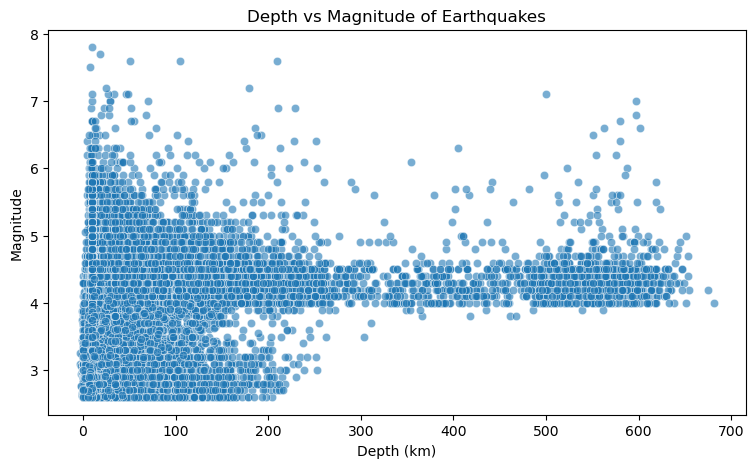

In [18]:
plt.figure(figsize=(9,5))
sns.scatterplot( x=data["depth"], y=data["mag"], alpha=0.6)
plt.title('Depth vs Magnitude of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

In [19]:
data['time'] = pd.to_datetime(data['time'], yearfirst=True)
data['month'] = data['time'].dt.month_name()
data['year'] = data['time'].dt.year
data['day'] = data['time'].dt.day
data['date'] = data['time'].dt.date

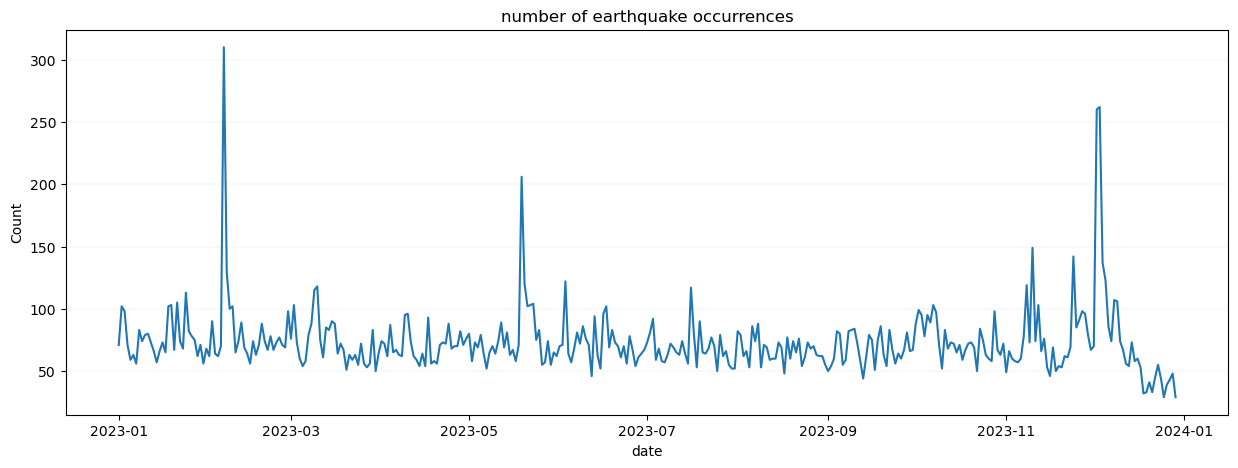

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(data.groupby('date')['day'].count().reset_index(name='Count'), x='date', y='Count')
plt.grid(axis='y',linewidth=0.1)
plt.title('number of earthquake occurrences')
plt.show()

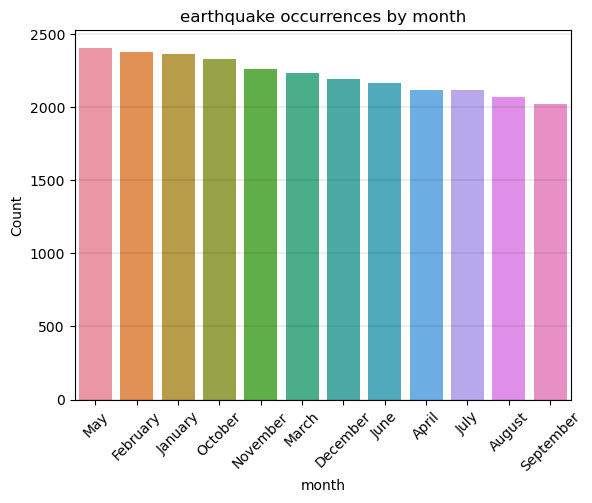

In [21]:
sns.barplot(data.groupby(['month'])['day'].count().sort_values(ascending=False).sort_values(ascending=False).reset_index(name='Count'), x='month', y='Count')
plt.xticks(rotation=45)
plt.title('earthquake occurrences by month')
plt.grid(axis='y', color='black', linestyle='-', linewidth=0.1)
plt.show()

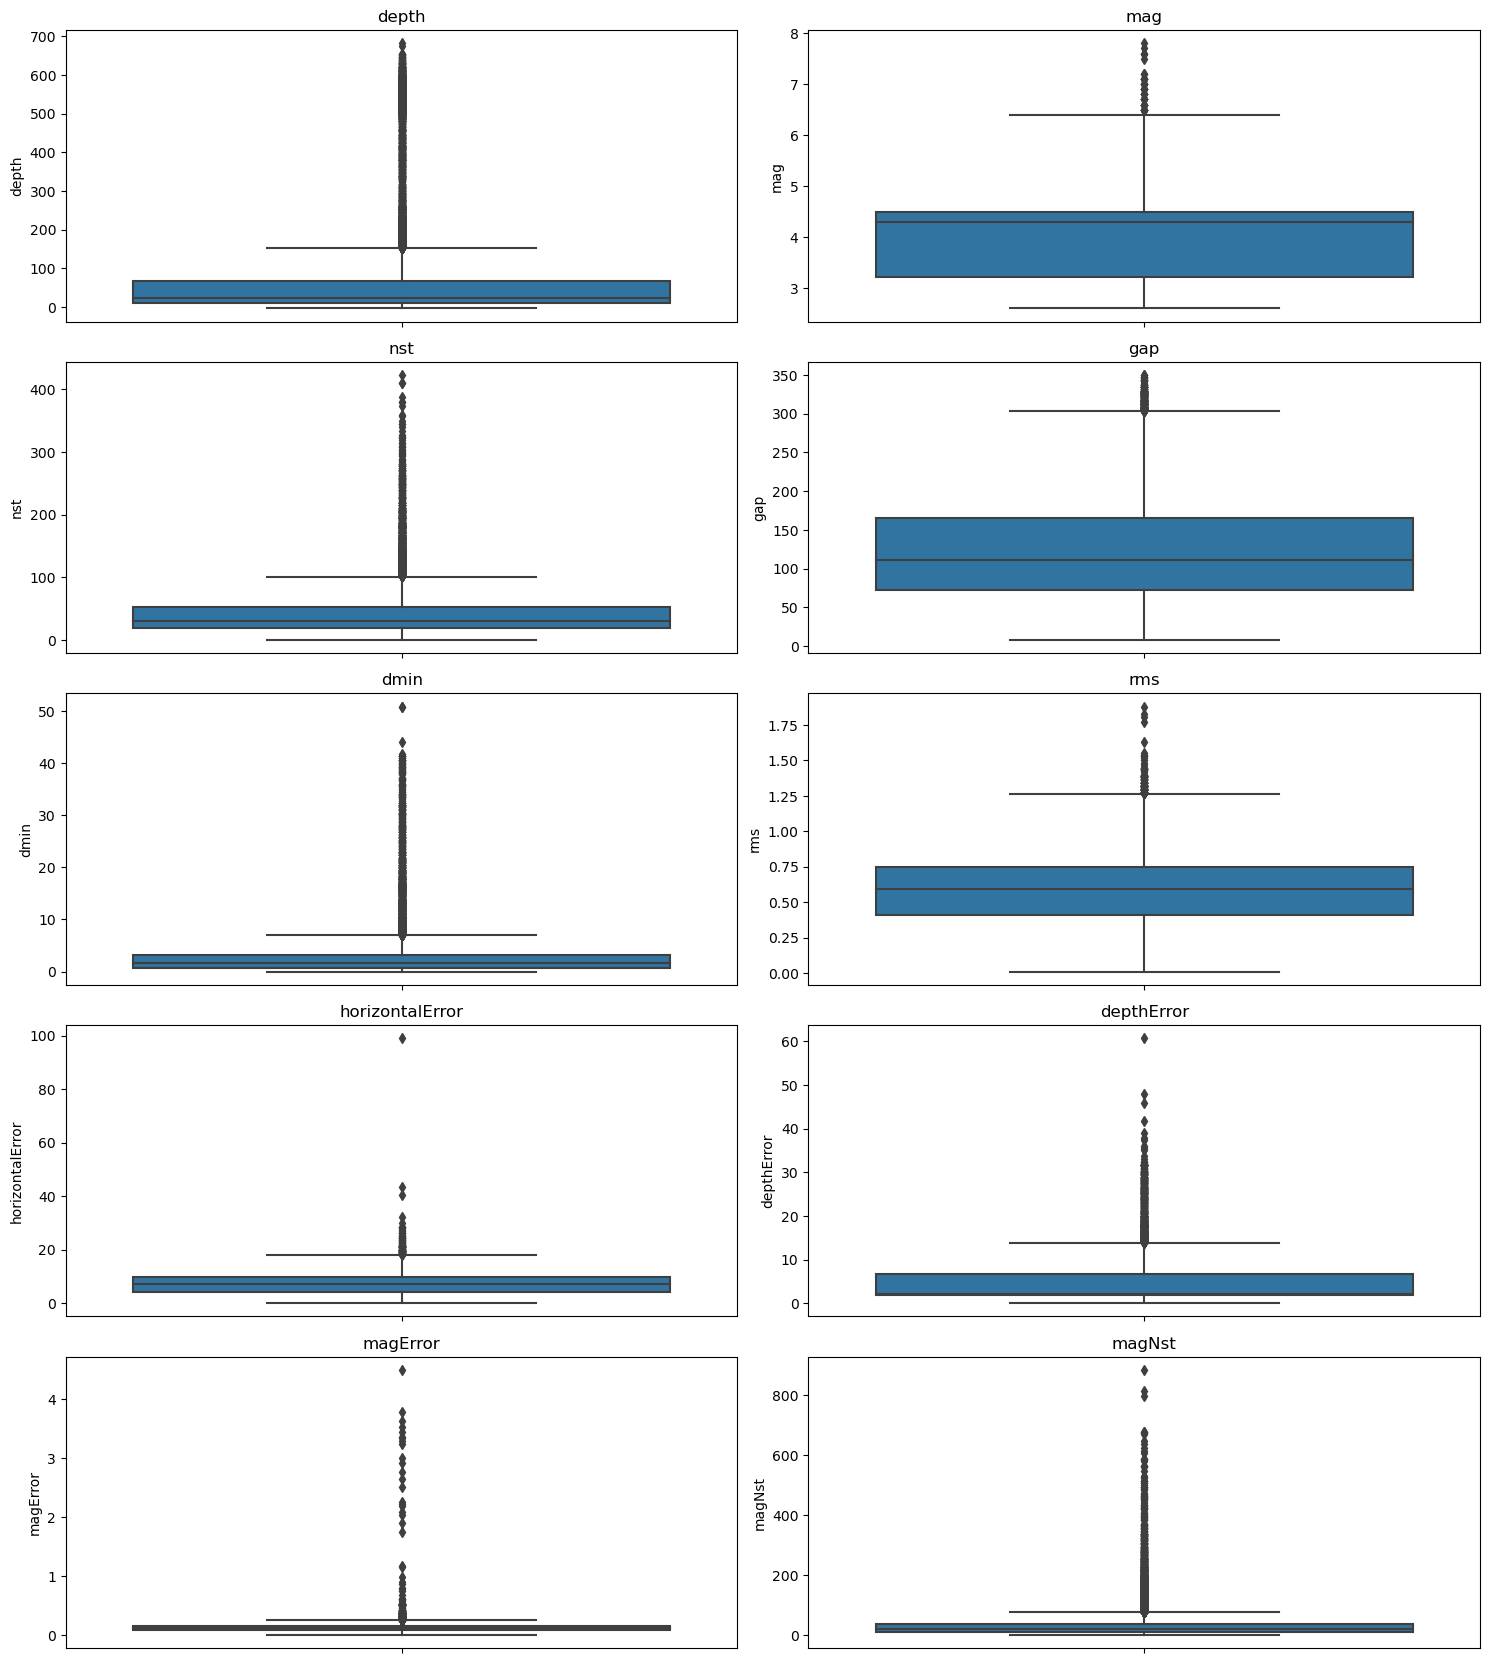

In [22]:
def plot_all_boxplots(data):

    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    num_cols = num_cols.drop(['latitude', 'longitude'])


    # Setting the size of the overall plot
    plt.figure(figsize=(15, 20))

    # Creating a boxplot for each numerical column
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols) // 2 + 1, 2, i + 1)
        sns.boxplot(y=data[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

#Calling the function to plot boxplots
plot_all_boxplots(data)

In [23]:
cols=data.select_dtypes(include=[np.number]).columns

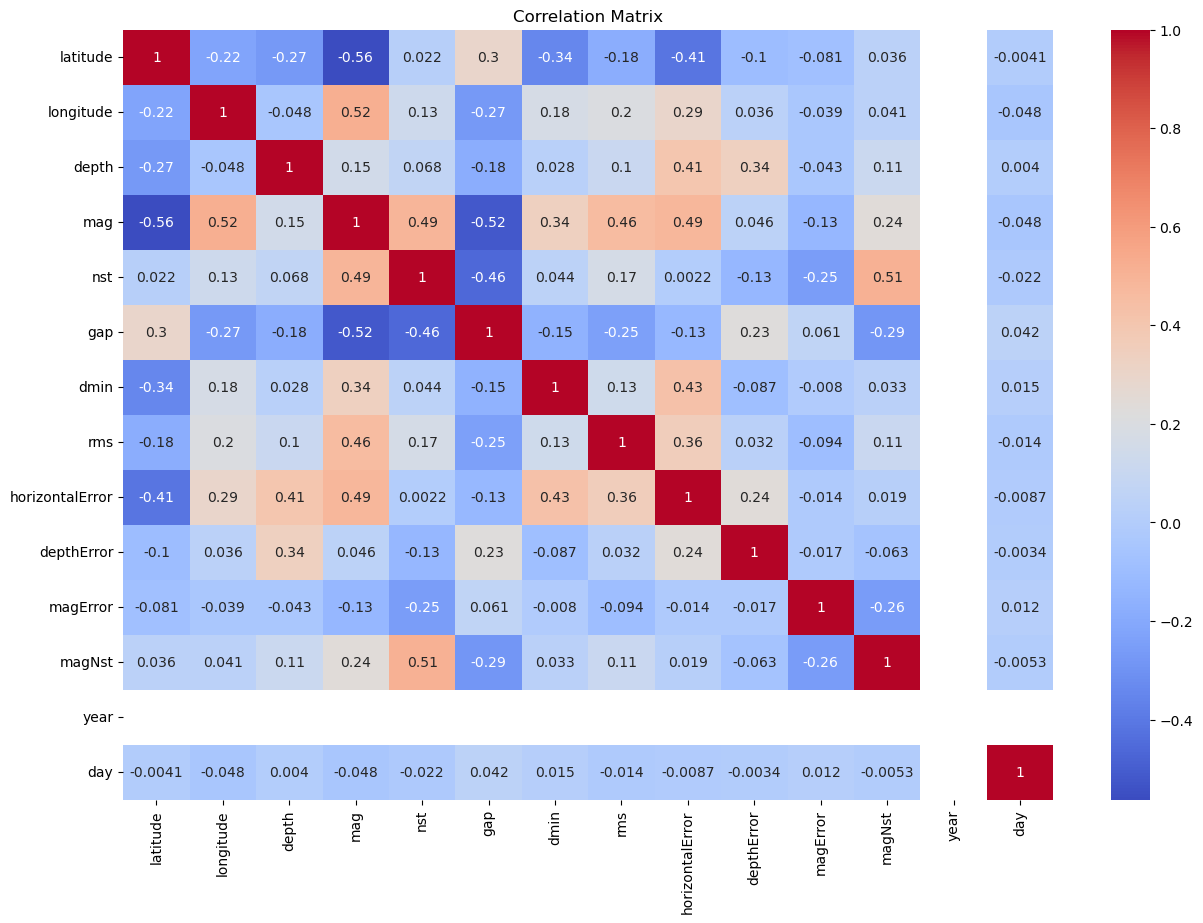

In [24]:
# Correlation Analysis
plt.figure(figsize=(15,10))
corr = data[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
data = data[data['type'] == 'earthquake']

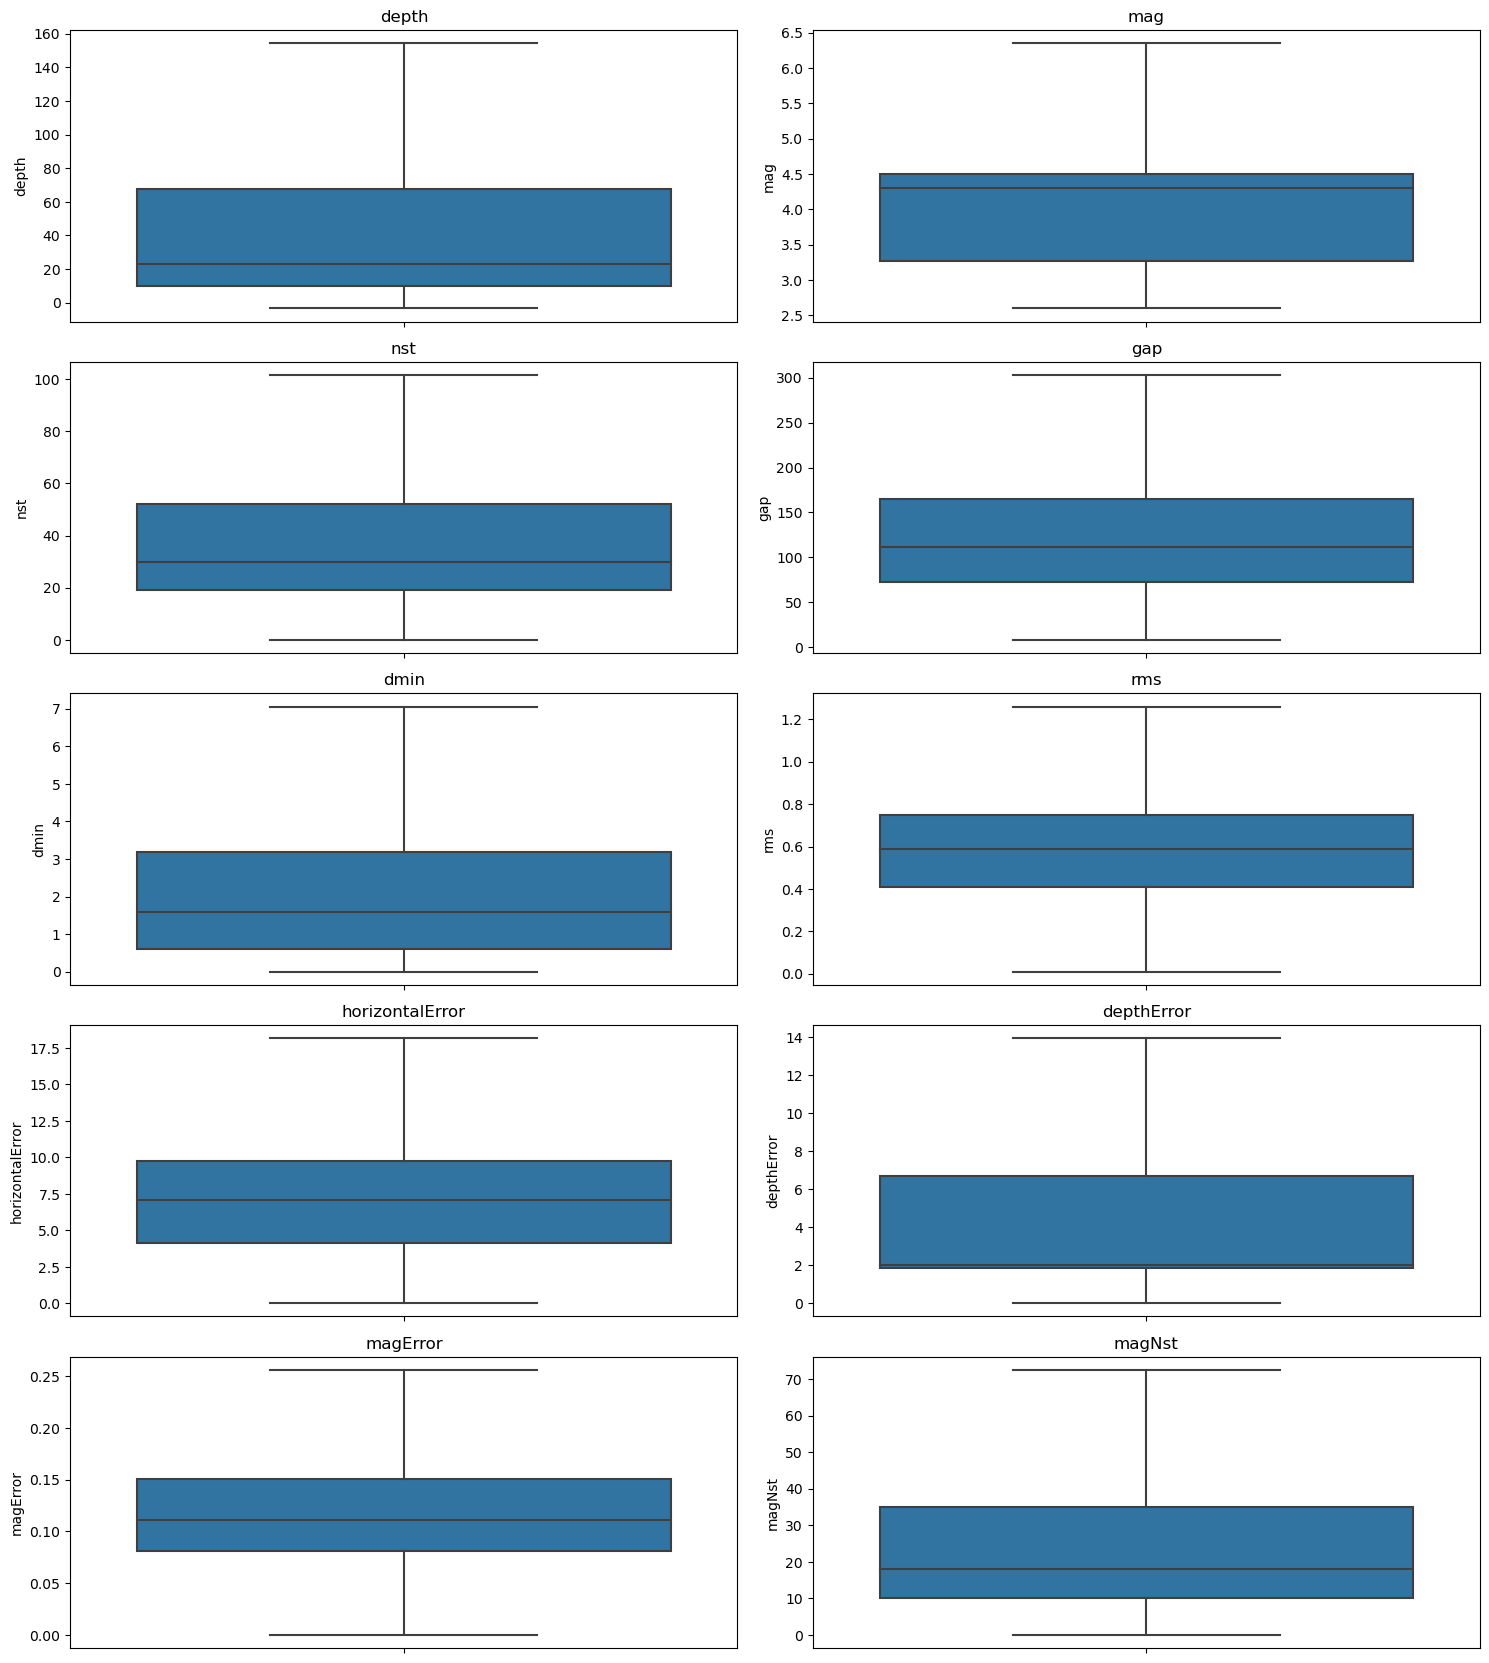

In [26]:
def handle_outliers(data):

    num_cols = data.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:

        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return data

# Handle outliers in the dataset
data_cleaned = handle_outliers(data)

# Plot boxplots again to check if outliers are handled
plot_all_boxplots(data_cleaned)

In [27]:
data.duplicated().sum()

1957

In [28]:
duplicates = data[data.duplicated()]

In [29]:
print("Number of duplicate rows:", len(duplicates))

Number of duplicate rows: 1957


In [30]:
# Remove duplicate rows

data.drop_duplicates(inplace=True)

In [31]:
data.duplicated().sum()

0

In [32]:
# fill the null value
data['nst'].fillna(data['nst'].median(), inplace=True)

data['gap'].fillna(data['gap'].median(), inplace=True)

data['dmin'].fillna(data['dmin'].median(), inplace=True)

data['horizontalError'].fillna(data['horizontalError'].median(), inplace=True)

data['magError'].fillna(data['magError'].median(), inplace=True)

data['magNst'].fillna(data['magNst'].median(), inplace=True)

In [33]:
data['place'].fillna('Unknown', inplace=True)

In [34]:
# Assuming 'data' is your DataFrame
categorical_columns = ['magType','type', 'status', 'locationSource', 'magSource']

# Create the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original DataFrame (excluding the original categorical columns)
data = pd.concat([data.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [35]:
#  import standard scaler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import time

In [42]:
features = data[['latitude', 'longitude', 'depth', 'horizontalError', 'depthError', 'magError']]
target = data['mag']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [44]:
def evaluate_model(model, X_test, y_test, model_name):
    start = time.time()
    predictions = model.predict(X_test)
    end = time.time()
    duration = end - start

    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, predictions)

    print(f"{model_name} Model")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R2 Score: {r2}")
    print(f"Prediction Time: {duration} seconds")

    plt.figure(figsize=(10, 6))
    plt.plot(y_test, predictions, 'o', label='Predictions')
    m, b = np.polyfit(y_test, predictions, 1)
    plt.plot(y_test, m*y_test + b, label='Best Fit Line')
    plt.xlabel("Actual Magnitude")
    plt.ylabel("Predicted Magnitude")
    plt.title(f"{model_name} Predictions")
    plt.legend()
    plt.show()

In [40]:
data = data.dropna()

Linear Regression Model
Mean Absolute Error: 0.3934163691847139
Mean Squared Error: 0.2561673118536866
Root Mean Squared Error: 0.5061297381637306
R2 Score: 0.5705483824752534
Prediction Time: 0.009095430374145508 seconds


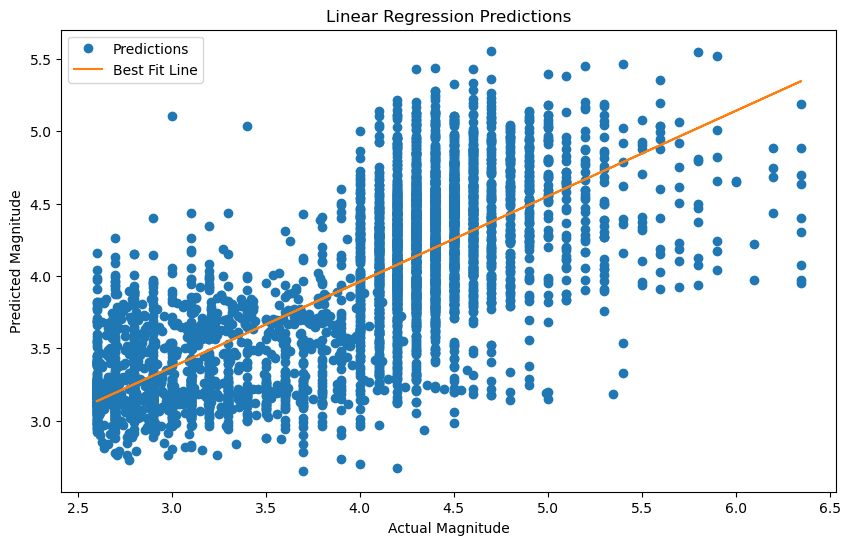

In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
evaluate_model(linear_model, X_test, y_test, "Linear Regression")

Decision Tree Model
Mean Absolute Error: 0.2576151181069003
Mean Squared Error: 0.15078431223615596
Root Mean Squared Error: 0.38830955722999655
R2 Score: 0.7472176823865838
Prediction Time: 0.0 seconds


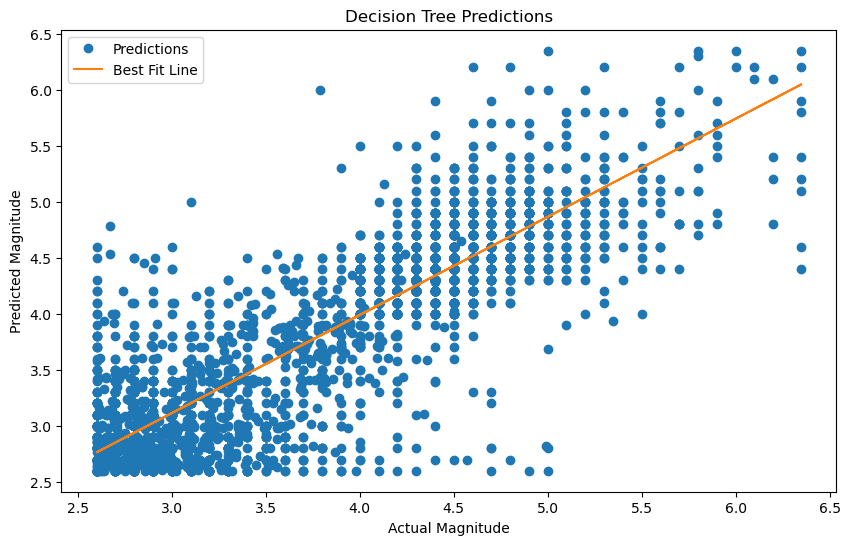

In [46]:
tree_model = DecisionTreeRegressor(random_state=40)
tree_model.fit(X_train, y_train)
evaluate_model(tree_model, X_test, y_test, "Decision Tree")

KNN Model
Mean Absolute Error: 0.2301127558228916
Mean Squared Error: 0.11162552704273648
Root Mean Squared Error: 0.3341040661870736
R2 Score: 0.8128654167517836
Prediction Time: 0.06032133102416992 seconds


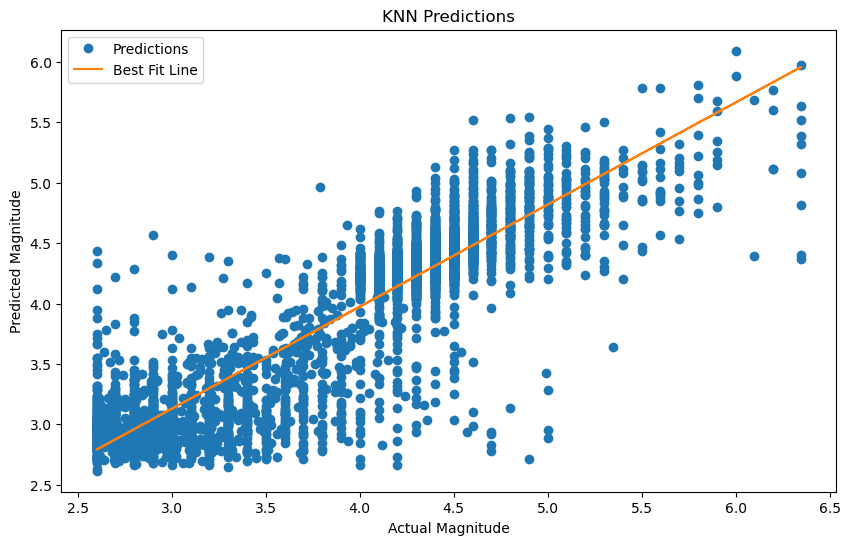

In [47]:
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test, "KNN")

Random Forest Model
Mean Absolute Error: 0.1955251199984708
Mean Squared Error: 0.08100461924977581
Root Mean Squared Error: 0.2846131044941111
R2 Score: 0.8641998289631042
Prediction Time: 0.11149382591247559 seconds


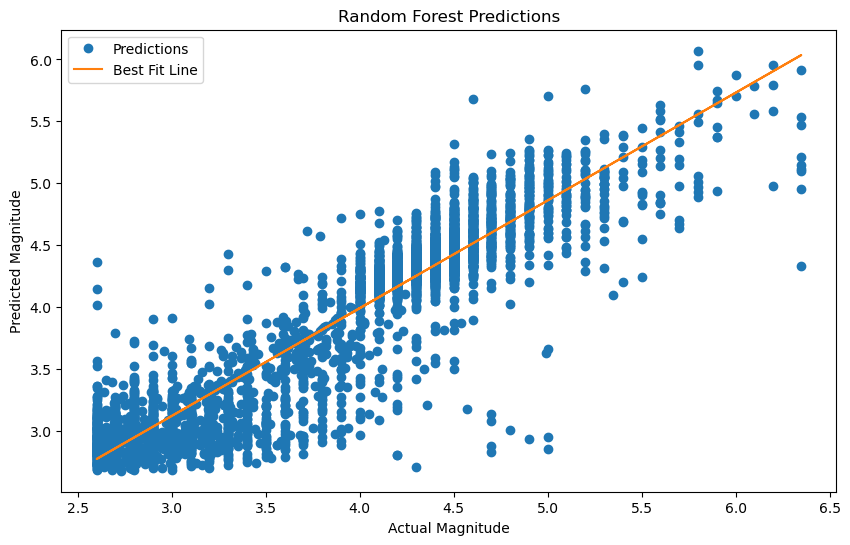

In [49]:
# Create the model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Evaluate the model
evaluate_model(rf_model, X_test, y_test, "Random Forest")

Support Vector Machine (SVM) Model
Mean Absolute Error: 0.23207898427792797
Mean Squared Error: 0.118065893078621
Root Mean Squared Error: 0.3436071784445444
R2 Score: 0.8020684669319651
Prediction Time: 4.6991448402404785 seconds


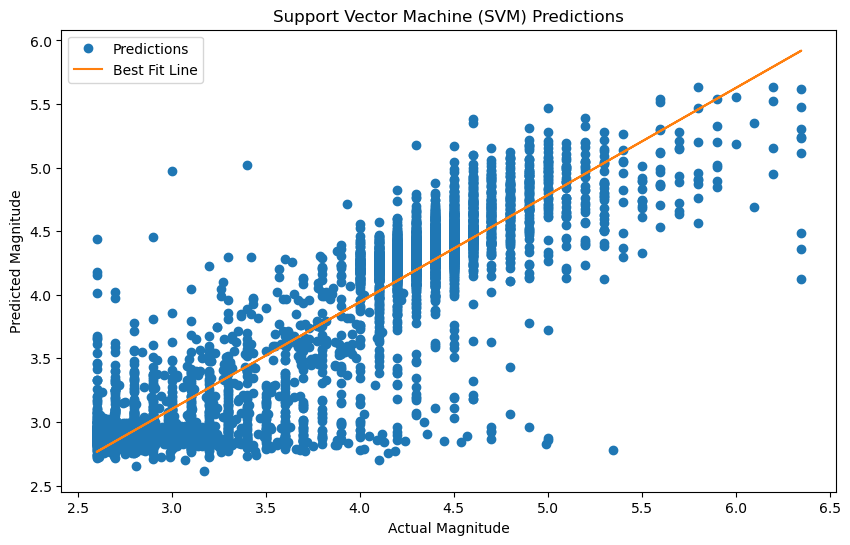

In [50]:
from sklearn.svm import SVR

# Create the SVM model
svm_model = SVR(kernel='rbf')

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Evaluate the model
evaluate_model(svm_model, X_test, y_test, "Support Vector Machine (SVM)")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("GridSearchCV Best Parameters:", grid_search.best_params_)
print("Best Score:",grid_search.best_score_)
evaluate_model(grid_search.best_estimator_, X_test, y_test, "Random Forest (GridSearchCV)")

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("RandomizedSearchCV Best Parameters:", random_search.best_params_)
print("Best Score:",random_search.best_score_)
evaluate_model(random_search.best_estimator_, X_test, y_test, "Random Forest (RandomizedSearchCV)")

# KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    rf_model.fit(X_train_fold, y_train_fold)
    evaluate_model(rf_model, X_val_fold, y_val_fold, "Random Forest (KFold)")

In [ ]:
import pickle

# Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Save the best model found by RandomizedSearchCV
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_search.best_estimator_, file)

# To load the model back
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)